# Обработка коммон-кейсов для трейнинг пула

In [454]:
import pandas as pd

In [455]:
df = pd.read_csv('data/train.csv')
print(df.shape)

(73995, 72)


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         73995 non-null  uint64 
 1   org_id                          73995 non-null  uint64 
 2   rating                          73995 non-null  float64
 3   ts                              73995 non-null  int64  
 4   user_city                       73995 non-null  object 
 5   org_city                        73995 non-null  object 
 6   average_bill                    45433 non-null  float64
 7   rating_org                      73995 non-null  float64
 8   rubrics                         73995 non-null  object 
 9   food_delivery                   73995 non-null  int64  
 10  breakfast                       73995 non-null  int64  
 11  takeaway                        73995 non-null  int64  
 12  summer_terrace                  

In [457]:
df.describe()

,user_id,org_id,rating,ts,average_bill,rating_org,food_delivery,breakfast,takeaway,summer_terrace,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
count,7.399500e+04,7.399500e+04,73995.000000,73995.000000,45433.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,9.196627e+18,9.038261e+18,4.322779,714.540766,1075.891973,4.319332,0.757119,0.576607,0.649206,0.602554,...,0.008014,0.007406,0.017677,0.002149,0.002419,0.001027,0.000932,0.001230,0.002960,0.001216
std,5.312861e+18,5.275833e+18,1.130370,293.492213,2733.507688,0.308584,0.428827,0.494100,0.477222,0.489373,...,0.089162,0.085739,0.131775,0.046306,0.049125,0.032032,0.030523,0.035047,0.054323,0.034854
min,1.445171e+14,1.626686e+15,1.000000,0.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.614445e+18,4.504716e+18,4.000000,505.000000,500.000000,4.180952,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.191287e+18,9.104453e+18,5.000000,699.000000,500.000000,4.368304,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.376070e+19,1.350392e+19,5.000000,958.000000,1000.000000,4.524001,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.844666e+19,1.844531e+19,5.000000,1216.000000,246500.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [458]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

In [459]:
df.ts.max()

1216

In [460]:
monthes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def monthes_from_2018(ts):
  i = 0
  res = 0
  while ts >= monthes[i]:
    ts -= monthes[i]
    i = (i + 1) % 12
    res += 1
  return 'M' + str(res)

df = df.assign(
  dateMM=df.apply(lambda row: monthes_from_2018(row.ts), axis=1)
)

In [461]:
print(df.average_bill.isna().sum())
df['average_bill'] = df['average_bill'].fillna(df.groupby('user_id')['average_bill'].transform('mean'))
print(df.average_bill.isna().sum())
df['average_bill'] = df['average_bill'].fillna(
  df.groupby(['dateMM', 'org_city'])['average_bill'].transform('mean'))
print(df.average_bill.isna().sum())

28562
26066
0


(array([7.3927e+04, 4.8000e+01, 8.0000e+00, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   500.,  25100.,  49700.,  74300.,  98900., 123500., 148100.,
        172700., 197300., 221900., 246500.]),
 <BarContainer object of 10 artists>)

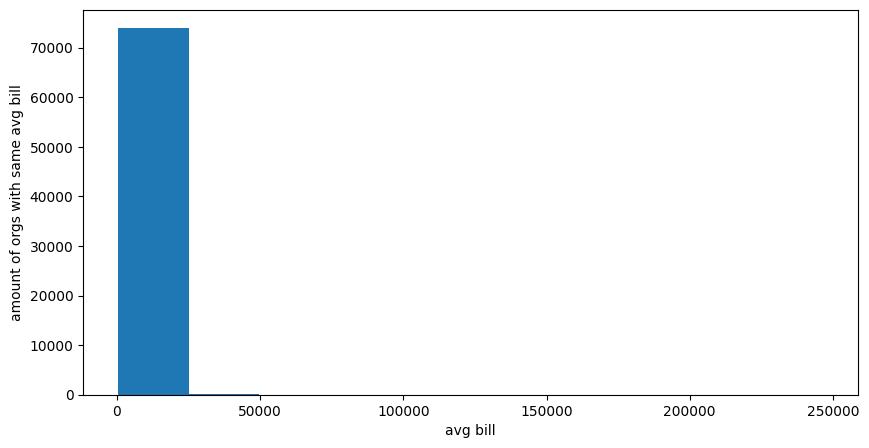

In [462]:
plt.xlabel('avg bill')
plt.ylabel('amount of orgs with same avg bill')
plt.hist(df.average_bill)

<AxesSubplot: xlabel='avg bill', ylabel='amount of orgs with same avg bill'>

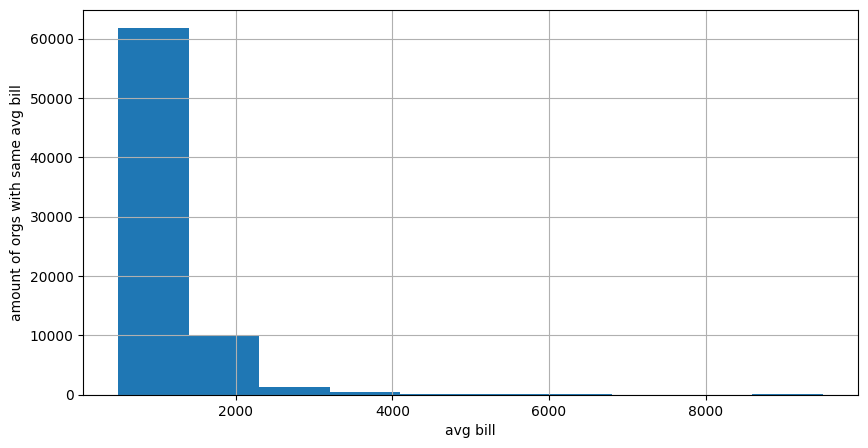

In [463]:
plt.xlabel('avg bill')
plt.ylabel('amount of orgs with same avg bill')
df1 = df[df.average_bill < 10000]
df1.average_bill.hist()

<AxesSubplot: xlabel='avg bill', ylabel='amount of orgs with same avg bill'>

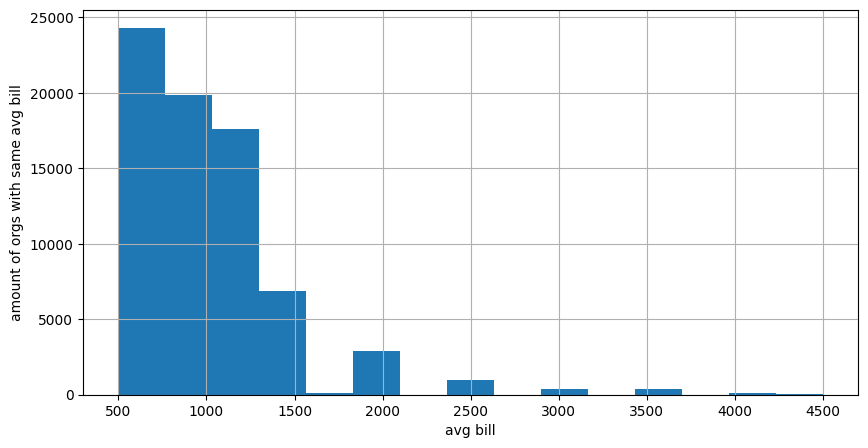

In [464]:
plt.xlabel('avg bill')
plt.ylabel('amount of orgs with same avg bill')
df1 = df[df.average_bill < 5000]
df1.average_bill.hist(bins=15)

In [465]:
df = df.assign(
  bill500=((df.average_bill <= 500)).astype(int),
  bill1000=((500 < df.average_bill) & (df.average_bill <= 1000)).astype(int),
  bill1500=((1000 < df.average_bill) & (df.average_bill <= 1500)).astype(int),
  bill2000=((1500 < df.average_bill) & (df.average_bill <= 2000)).astype(int),
  bill2500=((2000 < df.average_bill) & (df.average_bill <= 2500)).astype(int),
  bill3000=((2500 < df.average_bill) & (df.average_bill <= 3000)).astype(int),
  bill3500=((3000 < df.average_bill) & (df.average_bill <= 3500)).astype(int),
  bill4000=((3500 < df.average_bill) & (df.average_bill <= 4000)).astype(int),
  billExpensive=((4000 < df.average_bill)).astype(int)
)

In [466]:
df = df.assign(
  native_citizen=((df.user_city == df.org_city)).astype(int),
  tourist=((df.user_city != df.org_city)).astype(int)
)

In [467]:
df.rubrics.nunique()

14

<AxesSubplot: >

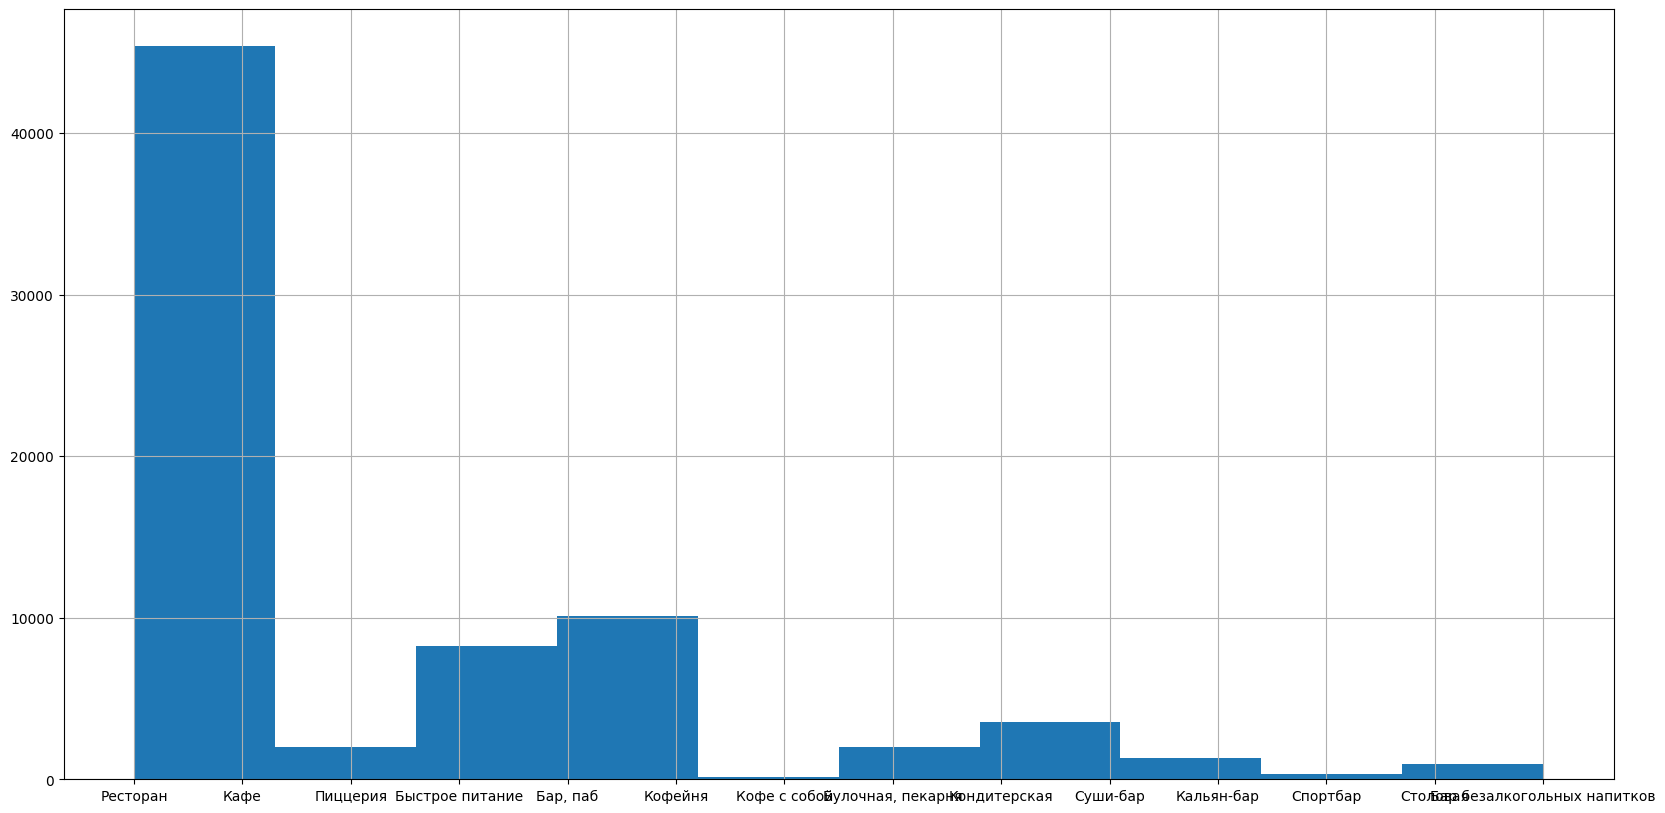

In [468]:
df.rubrics.hist(figsize=(20, 10))

In [469]:
df = df.assign(
  is_restraunt=((df.rubrics == 'Ресторан')).astype(int),
  is_caffe=((df.rubrics == 'Кафе')).astype(int),
  is_other=((df.rubrics != "Ресторан") & (df.rubrics != "Кафе")).astype(int)
)

<AxesSubplot: >

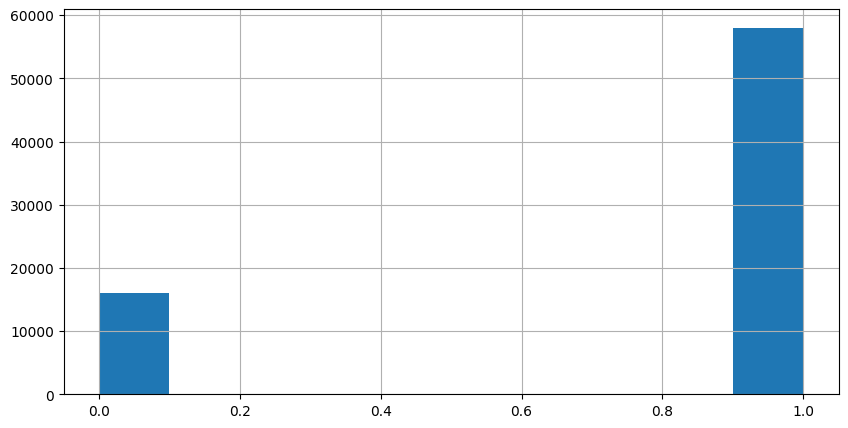

In [470]:
df = df.assign(
  resist_covid=((df.closed_for_quarantine == 0) | (df.online_takeaway == 1)).astype(int)
)
df.resist_covid.hist()

<AxesSubplot: >

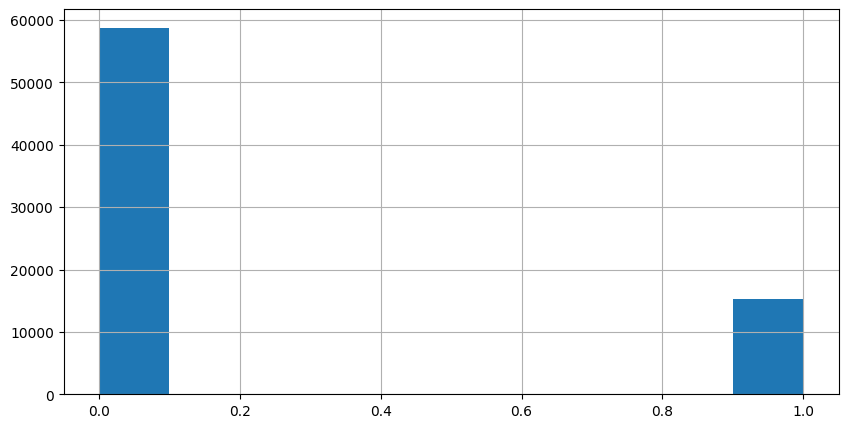

In [471]:
df = df.assign(
  for_adult=((df.craft_beer == 1) | (df.has_bar == 1) | (df.face_control == 1) | (df.strip == 1) | (df.vinotheque == 1) | (df.kalyan == 1)).astype(int)
)

df.for_adult.hist()

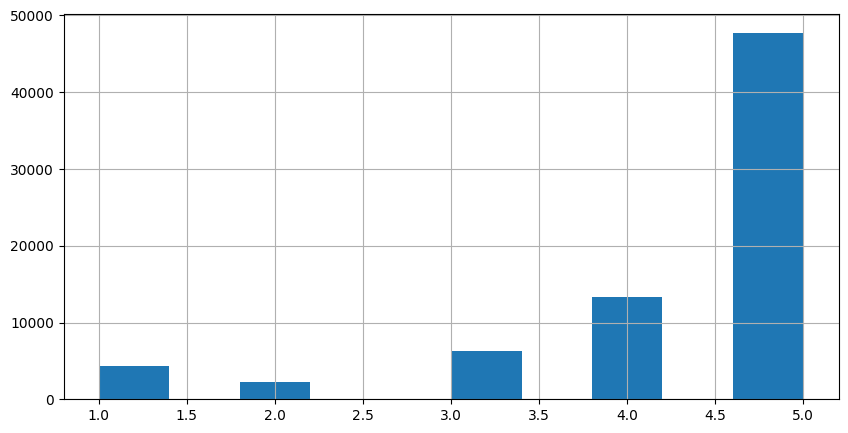

In [472]:
df.rating.hist()

df = df.assign(
  rating_1=((df.rating == 1.0)).astype(int),
  rating_2=((df.rating == 2.0)).astype(int),
  rating_3=((df.rating == 3.0)).astype(int),
  rating_4=((df.rating == 4.0)).astype(int),
  rating_5=((df.rating == 5.0)).astype(int)
)

In [473]:
def get_org_id(org_id):
  return 'ID_' + str(org_id)

df = df.assign(
  org_id=df.apply(lambda row: get_org_id(row.org_id), axis=1)
)

In [474]:
df.to_csv('processed_data/00-train.csv', index=False)